In [1]:
from sherlock.utils import approximate_pareto
import glob
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [20]:
METRICS_PATH = "./metrics"
all_metrics = {}
for fname in glob.iglob(METRICS_PATH + "/*.json"):
    quant_config = "_".join(os.path.basename(fname.replace(" (1)", ""))[:-5].split("_")[-5:])
    with open(fname, "r") as f:    
        metrics_data = json.load(f)
    metrics_data["time"] =  os.path.getmtime(fname)
    all_metrics[quant_config] = metrics_data

y_list = []
ids = []
for k, v in all_metrics.items():
    ids.append(k)
    y_list.append([v["performance"],1/(v["bops"]/1e6)])

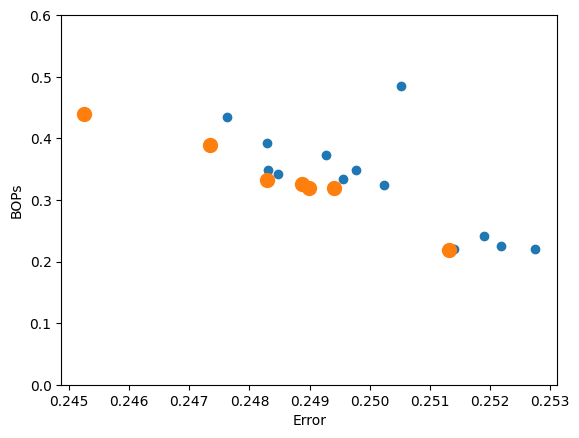

In [23]:
plt.figure()
y = np.array(y_list)
y_pareto = approximate_pareto(y)[0]
plt.scatter(1-y[:,0], 1/y[:,1])
plt.scatter(1-y_pareto[:,0], (1/y_pareto[:,1]),s=100)
plt.xlabel("Error")
plt.ylabel("BOPs")
#plt.yscale("log")
#plt.xlim(0.266, 0.284)
plt.ylim(0, 0.6)
# plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
# plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()